**Part 1: Read in image data and investigate image bands**
---

Goal: Read in and visualize photos of water quality samples
---
---
**Background**

* We have four water quality samples that have been analyzed for chlorophyll-a concentrations, measured in micrograms of chlorophyll-a per liter of water (µg/l). Chlorophyll-a is a pigment that is abundant in plant life and gives plants their green color. Measurements of chlorohyll-a concentration are often used to estimate the amount of algae in a water sample.

* We see objects with high chlorophyll-a content as green because chlorophyll-a **reflects** light wavelengths in the green range of the color spectrum. This means that water samples with higher chlorophyll-a concentrations often appear more green.

* We would like to test if there's a relationship between the color of a water sample and its chlorophyll-a concentration. We'll start by visualizing our water samples.


---
**Instructions**

1. Take an overhead picture of each water sample. Transfer the photos to you computer. Now save them as sample1.jpg, sample2.jpg, sample3.jpg, and sample4.jpg

2. Click the folder icon Screen Shot 2024-02-08 at 12.25.17 PM.png on the left hand side of the screen. Then click the upload icon Screen Shot 2024-02-08 at 12.25.40 PM.png, navigate to your saved photos, and select the photos (sample 1, 2, 3, and 4) for upload.




Run the below code to install the necessary packages

In [22]:
!pip install gdal
!pip install rasterio
!pip install netcdf4
!pip install geopandas
!pip install geojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00


3. Run the code below to plot out the images of each of the samples.

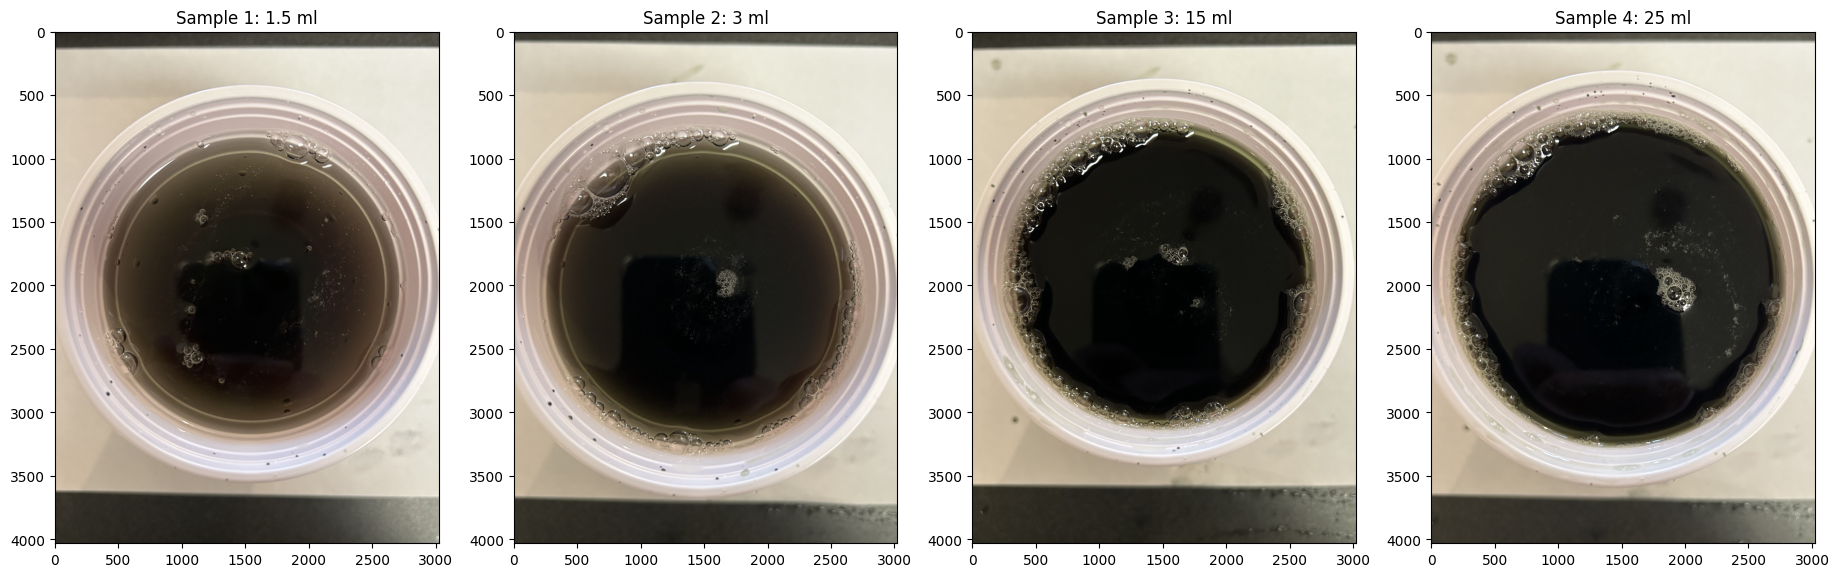

In [1]:
# Python program to read
# image using matplotlib

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Read Images
img1 = mpimg.imread('/content/sample1.jpg')
img1 = (img1 - np.min(img1)) / (np.max(img1) - np.min(img1))
img2 = mpimg.imread('/content/sample2.jpg')
img2 = (img2 - np.min(img2)) / (np.max(img2) - np.min(img2))
img3 = mpimg.imread('/content/sample3.jpg')
img3 = (img3 - np.min(img3)) / (np.max(img3) - np.min(img3))
img4 = mpimg.imread('/content/sample4.jpg')
img4 = (img4 - np.min(img4)) / (np.max(img4) - np.min(img4))

# Output Images
fig, ax = plt.subplots(1,4)
fig.set_size_inches(18.5, 10.5, forward=True)
ax[0].imshow(img1)
ax[0].set_title("Sample 1: 1.5 ml")
ax[1].imshow(img2)
ax[1].set_title("Sample 2: 3 ml")
ax[2].imshow(img3)
ax[2].set_title("Sample 3: 15 ml")
ax[3].imshow(img4)
ax[3].set_title("Sample 4: 25 ml")
fig.tight_layout()
plt.show()


Now that we've read our images into Google Colab, we can investigate the reflectance data that create each image.


---
**Background**

* Simple cameras take photos using three **bands**: Red, Green, and Blue. Images are created by varying the reflectance values of each of these colors.
* In the code above we normalized our image data so reflectance values range from 0 to 1.

---
**Instructions**
* Run the below code to plot each band from the sample 4 image

---

*Questions*:
  * Which areas of the image appear to have the highest reflectance values? Why do you think that is?





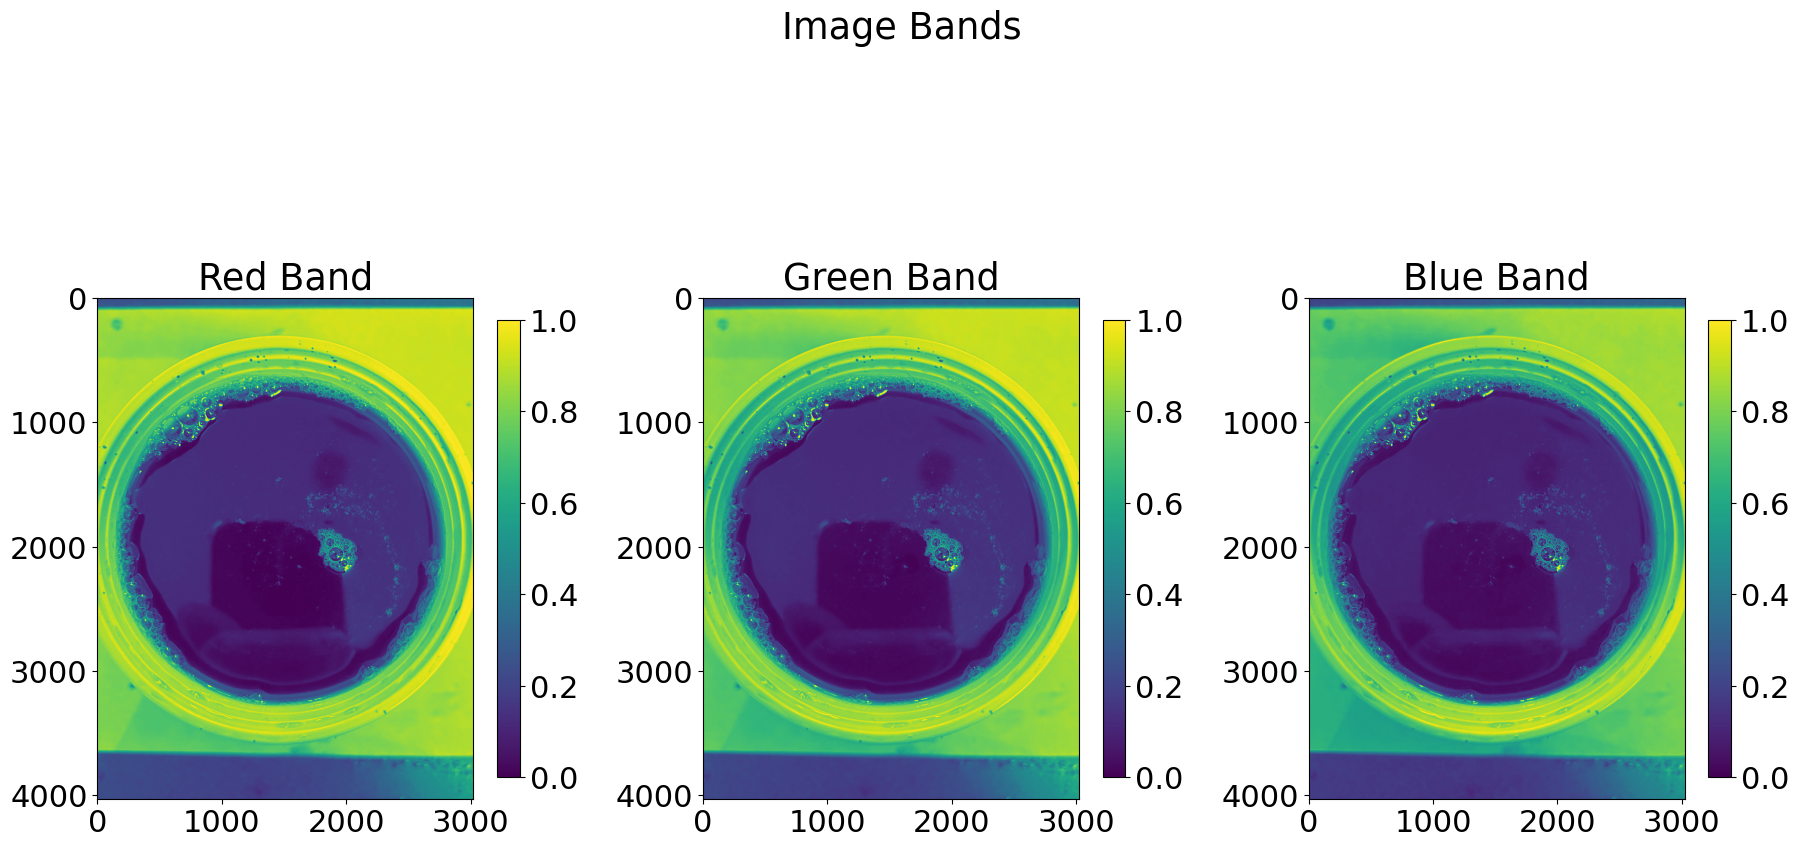

In [2]:
plt.rcParams.update({'font.size': 22})


# find minimum of minima & maximum of maxima
minmin = np.min(img4)
maxmax = np.max(img4)

fig, ax = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5, forward=True)
i1=ax[0].imshow(img4[:,:,0], vmin=minmin, vmax=maxmax)
ax[0].set_title("Red Band")
i2=ax[1].imshow(img4[:,:,1], vmin=minmin, vmax=maxmax)
ax[1].set_title("Green Band")
i3=ax[2].imshow(img4[:,:,2], vmin=minmin, vmax=maxmax)
ax[2].set_title("Blue Band")

fig.suptitle("Image Bands")
fig.colorbar(i1, shrink=0.5)
fig.colorbar(i2, shrink=0.5)
fig.colorbar(i3, shrink=0.5)
fig.tight_layout()
plt.show()

Goal: Investigate differences in the images by plotting reflectance data in a bar plot.
---
---
Because it can be difficult to tell differences between reflectance in photos by sight, we will calculate differences in reflectance between images and display them in graphs. We will display reflectance values in two different ways.

---
**Background**

* A **bar plot** is a type of graph. The height of each bar shows the average value for each variable of interest.

* Here, we will calculate the average value of the Red, Green, and Blue image bands from photos of each sample and display them as a barplot.


---
**Instructions**

* Run the code below and investigate the resulting graphs of average reflectance value for each band. Answer the questions below.



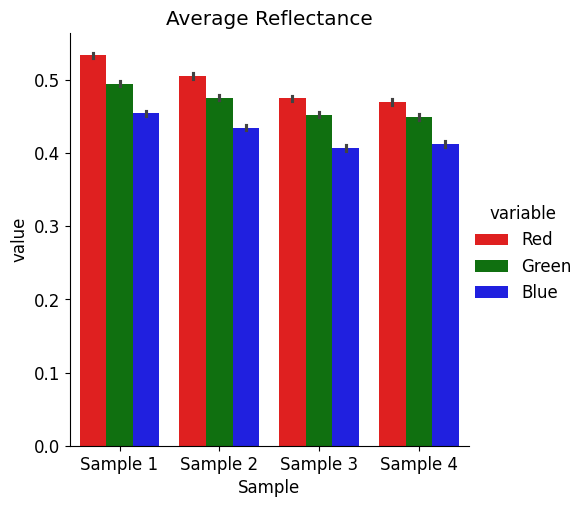

In [17]:
import pandas as pd
import seaborn as sns
import scipy.ndimage
plt.rcParams.update({'font.size': 12})
imgcollection = [img1,img2,img3,img4]
sampleLabels = ['Sample 1','Sample 2','Sample 3','Sample 4']
bandName = ['Red','Green','Blue']

imgDf=[]
RedCount=[]
GreenCount=[]
BlueCount=[]
for i, img in enumerate(imgcollection):
  img=scipy.ndimage.zoom(img, (0.05,0.05,1), order=0)

  filterVal = 0.95
  #Filter out white
  img[(img[:,:,0] >filterVal) & (img[:,:,1] > filterVal) &(img[:,:,2] >filterVal)] = np.nan

  RedCount.append(np.nansum(img[:,:,0]==1))
  GreenCount.append(np.nansum(img[:,:,1]==1))
  BlueCount.append(np.nansum(img[:,:,2]==1))

  a1, a2, a3 = img.shape
  hold = pd.DataFrame(img.reshape(a1*a2,a3))
  hold.columns = bandName

  hold['Sample'] = sampleLabels[i]
  imgDf.append(hold)

imgDf=pd.concat(imgDf)
imgDf=pd.melt(imgDf,id_vars=['Sample'])

#Average Pixel Value
sns.catplot(data=imgDf,x='Sample', y='value',hue='variable',kind='bar',palette=sns.color_palette(['red','green', 'blue']))
plt.title("Average Reflectance")
plt.show()




---

*Questions:*

* How do reflectance values for each band change between samples?

* Which bands change the most and which change the least? Why do you think this is?



**Part 2: Statistical modeling of chlorophyll-a**
---

Goal: Build a linear model that estimates the relationship between band reflectance and chlorophyll-a concentration
---
---

Now that we have calculated approximate reflectance values for each image, we will compare those values to the chlorophyll-a concentration of each sample. The below values were measured in the lab.

---
**Instructions**
1. Input the chlorophyll-a data in the code below and run the section.


In [4]:
import numpy as np
#Enter the Chlorophyll-a data
sample1 = 0.15 #Chlorophyll-a concentration in sample 1
sample2 = 0.17 #Chlorophyll-a concentration in sample 2
sample3 = 1.08 #Chlorophyll-a concentration in sample 3
sample4 = 2.84 #Chlorophyll-a concentration in sample 4


#Combine into one array
chla = np.array([sample1,sample2,sample3,sample4]).reshape(-1,1)

2. Run the code below to take the average reflectance value from each image and create three linear models using average reflectance value from each band of the image.

Text(0.5, 0, 'Reflectance')

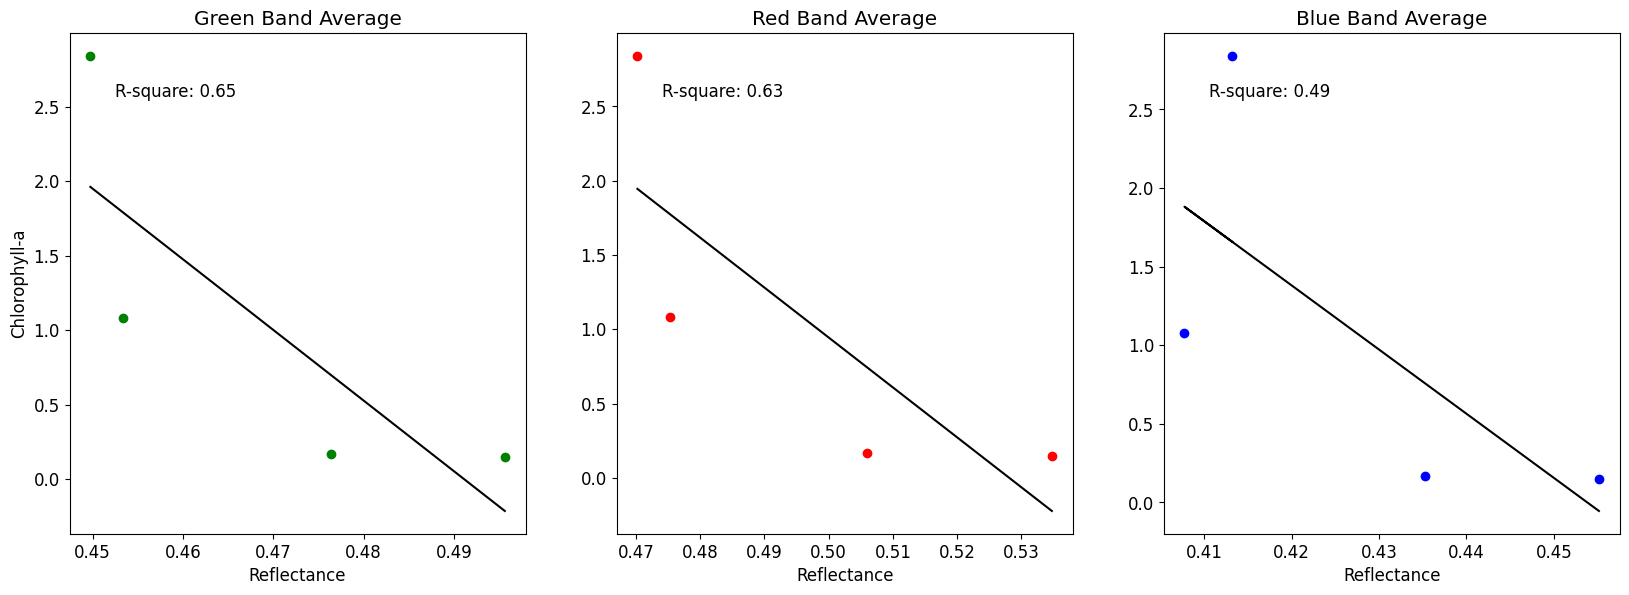

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Crop images
#0 = Red, 1 = Green, 2 = Blue

img_means_r = np.array([np.nanmean(img1[:,:,0]),np.nanmean(img2[:,:,0]),np.nanmean(img3[:,:,0]),np.nanmean(img4[:,:,0])]).reshape(-1,1)
img_means_g = np.array([np.nanmean(img1[:,:,1]),np.nanmean(img2[:,:,1]),np.nanmean(img3[:,:,1]),np.nanmean(img4[:,:,1])]).reshape(-1,1)
img_means_b = np.array([np.nanmean(img1[:,:,2]),np.nanmean(img2[:,:,2]),np.nanmean(img3[:,:,2]),np.nanmean(img4[:,:,2])]).reshape(-1,1)


#Create Linear regressions
green = linear_model.LinearRegression()
green.fit(img_means_g, chla)
chla_g_p = green.predict(img_means_g)

red = linear_model.LinearRegression()
red.fit(img_means_r, chla)
chla_r_p = red.predict(img_means_r)

blue = linear_model.LinearRegression()
blue.fit(img_means_b, chla)
chla_b_p = blue.predict(img_means_b)


#Figure code
fig, ax = plt.subplots(1,3,figsize=(6,10))
fig.set_size_inches(20, 6.5, forward=True)
ax[0].scatter(img_means_g,chla,color="green")
ax[0].plot(img_means_g,chla_g_p,color="black")
ax[0].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_g_p), ha='left', va='top',transform = ax[0].transAxes)
ax[0].set_title("Green Band Average")
ax[0].set_xlabel('Reflectance')
ax[0].set_ylabel('Chlorophyll-a')

ax[1].scatter(img_means_r,chla, color="red")
ax[1].plot(img_means_r,chla_r_p,color="black")
ax[1].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_r_p), ha='left', va='top',transform = ax[1].transAxes)
ax[1].set_title("Red Band Average")
ax[1].set_xlabel('Reflectance')

ax[2].scatter(img_means_b,chla, color="blue")
ax[2].plot(img_means_b,chla_b_p,color="black")
ax[2].text(0.1, 0.9, "R-square: %.2f" % r2_score(chla,chla_b_p), ha='left', va='top',transform = ax[2].transAxes)
ax[2].set_title("Blue Band Average")
ax[2].set_xlabel('Reflectance')


---
*Questions*
1. Based on R-squared, which model best predicts chlorophyll-a? (R2 score closer to 1 = better model)
2. Why do you think one method predicts chlorophyll-a better than others?

In [20]:
#Type the best model below (red, green, or blue)
model = green

**Part 3: Model Application**
---

Goal: Apply the chlorophyll-a model to an image of Lake Mendota.
---

Finally, we will use our model to approximate chlorophyll-a from an image of Lake Mendota.

---
**Instructions**
* Download the image file Mendota_Image.tif from [this link](https://drive.google.com/drive/u/0/folders/1zbbgsicJFxuHcTIkxg4_edrEEjoM-lPA?ths=true).
* Upload the image to Google Colab
* Run the code segment below

In [21]:
import rasterio
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.mask import mask
from rasterio.plot import show

src=rasterio.open('MendotaImage.tif')

model = average
#Normalize and plot rgb image
out_img = src.read()

def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

r=norm(out_img[3])
g=norm(out_img[2])
b=norm(out_img[1])

rgb=np.dstack((r,g,b))

#Take band corresponding to the model chosen above and model chlorophyll across the lake
mendota_chl = model.predict(g.reshape(-1,1))
mendota_chl=mendota_chl.reshape(g.shape)

#Remove NaN values and negative values
mendota_chl[mendota_chl==mendota_chl[0][0]]=np.nan
mendota_chl[mendota_chl<0]=0

fig, ax = plt.subplots(figsize=(8,5))
model_plot=plt.imshow(mendota_chl,cmap='BuGn')
plt.title("Modeled Chlorophyll-a, Lake Mendota")
fig.colorbar(model_plot, ax=ax, location='right')


ModuleNotFoundError: No module named 'rasterio'

---
*Questions*
1. Which areas of Lake Mendota appear to have the highest chlorophyll-a?
2. Do you think the model worked well? What are some limitations of this approach to estimating chlorophyll-a?